In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from bs4 import BeautifulSoup

html = """
<!DOCTYPE html>
<html>
<body>

<p>This is a paragraph.</p>
<p>This is a paragraph.</p>
<p>This is a paragraph.</p>

</body>
</html>
"""

bs = BeautifulSoup(html)
all_p_tags = bs.find_all("p")
print("tags found:", all_p_tags)
extracted_text = " ".join(map(lambda x: x.text, all_p_tags))
print("text extracted: '{}'".format(extracted_text))

tags found: [<p>This is a paragraph.</p>, <p>This is a paragraph.</p>, <p>This is a paragraph.</p>]
text extracted: 'This is a paragraph. This is a paragraph. This is a paragraph.'


/usr/local/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [4]:
import re
cleaned_text = re.sub("[^a-zA-Z0-9 ]", "", extracted_text)
print("extracted text: '{}'".format(extracted_text))
print("cleaned text: '{}'".format(cleaned_text))

extracted text: 'This is a paragraph. This is a paragraph. This is a paragraph.'
cleaned text: 'This is a paragraph This is a paragraph This is a paragraph'


In [5]:
from nltk.stem import PorterStemmer

words = ['caresses', 'flies', 'dies', 'mules', 'denied', 'died', 'agreed', 'owned', 
         'humbled', 'sized', 'meeting', 'stating', 'siezing', 'itemization', 'sensational', 
         'traditional', 'reference', 'colonizer', 'plotted']

ps = PorterStemmer()
for word in words: 
    print(word, "->", ps.stem(word))

caresses -> caress
flies -> fli
dies -> die
mules -> mule
denied -> deni
died -> die
agreed -> agre
owned -> own
humbled -> humbl
sized -> size
meeting -> meet
stating -> state
siezing -> siez
itemization -> item
sensational -> sensat
traditional -> tradit
reference -> refer
colonizer -> colon
plotted -> plot


In [12]:
df = pd.read_csv("dataset2.tsv", sep="\t")

In [13]:
df.head()

,positive,text
0,1,With all this stuff going down at the moment w...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,0,The film starts with a manager (Nicholas Bell)...
3,0,It must be assumed that those who praised this...
4,1,Superbly trashy and wondrously unpretentious 8...


In [14]:
from sklearn.feature_extraction.text import CountVectorizer

"""
Convert a collection of text documents to a matrix of token counts

This implementation produces a sparse representation of the counts using
scipy.sparse.coo_matrix.

Parameters
----------
input : string {'filename', 'file', 'content'}
    If 'filename', the sequence passed as an argument to fit is
    expected to be a list of filenames that need reading to fetch
    the raw content to analyze.

    If 'file', the sequence items must have a 'read' method (file-like
    object) that is called to fetch the bytes in memory.

    Otherwise the input is expected to be the sequence strings or
    bytes items are expected to be analyzed directly.

encoding : string, 'utf-8' by default.
    If bytes or files are given to analyze, this encoding is used to
    decode.

analyzer : string, {'word', 'char', 'char_wb'} or callable
    Whether the feature should be made of word or character n-grams.
    Option 'char_wb' creates character n-grams only from text inside
    word boundaries.

    If a callable is passed it is used to extract the sequence of features
    out of the raw, unprocessed input.

preprocessor : callable or None (default)
    Override the preprocessing (string transformation) stage while
    preserving the tokenizing and n-grams generation steps.

tokenizer : callable or None (default)
    Override the string tokenization step while preserving the
    preprocessing and n-grams generation steps.
    Only applies if ``analyzer == 'word'``.

ngram_range : tuple (min_n, max_n)
    The lower and upper boundary of the range of n-values for different
    n-grams to be extracted. All values of n such that min_n <= n <= max_n
    will be used.

stop_words : string {'english'}, list, or None (default)
    If 'english', a built-in stop word list for English is used.

    If a list, that list is assumed to contain stop words, all of which
    will be removed from the resulting tokens.
    Only applies if ``analyzer == 'word'``.

    If None, no stop words will be used. max_df can be set to a value
    in the range [0.7, 1.0) to automatically detect and filter stop
    words based on intra corpus document frequency of terms.

max_features : int or None, default=None
    If not None, build a vocabulary that only consider the top
    max_features ordered by term frequency across the corpus.

    This parameter is ignored if vocabulary is not None.

vocabulary : Mapping or iterable, optional
    Either a Mapping (e.g., a dict) where keys are terms and values are
    indices in the feature matrix, or an iterable over terms. If not
    given, a vocabulary is determined from the input documents. Indices
    in the mapping should not be repeated and should not have any gap
    between 0 and the largest index.

binary : boolean, default=False
    If True, all non zero counts are set to 1. This is useful for discrete
    probabilistic models that model binary events rather than integer
    counts.
"""

cv = CountVectorizer(input="content", analyzer="word")
BoW_matrix = cv.fit_transform(df.text)
BoW_matrix

<2500x28654 sparse matrix of type '<class 'numpy.int64'>'
	with 347885 stored elements in Compressed Sparse Row format>

In [15]:
from sklearn.feature_extraction.text import TfidfTransformer

"""
Parameters
----------
norm : 'l1', 'l2' or None, optional
    Norm used to normalize term vectors. None for no normalization.

use_idf : boolean, default=True
    Enable inverse-document-frequency reweighting.

smooth_idf : boolean, default=True
    Smooth idf weights by adding one to document frequencies, as if an
    extra document was seen containing every term in the collection
    exactly once. Prevents zero divisions.
"""

tfidfer = TfidfTransformer()
tfidfed_matrix = tfidfer.fit_transform(BoW_matrix)
tfidfed_matrix

<2500x28654 sparse matrix of type '<class 'numpy.float64'>'
	with 347885 stored elements in Compressed Sparse Row format>

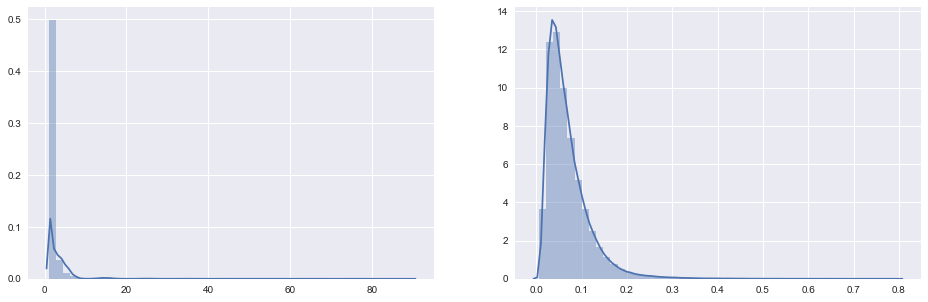

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

sns.distplot(BoW_matrix.data, ax=ax1)
sns.distplot(tfidfed_matrix.data, ax=ax2)

In [17]:
from sklearn.feature_extraction.text import FeatureHasher

"""
Parameters
----------
n_features : integer, optional
    The number of features (columns) in the output matrices. Small numbers
    of features are likely to cause hash collisions, but large numbers
    will cause larger coefficient dimensions in linear learners.
input_type : string, optional, default "dict"
    Either "dict" (the default) to accept dictionaries over
    (feature_name, value); "pair" to accept pairs of (feature_name, value);
    or "string" to accept single strings.
    feature_name should be a string, while value should be a number.
    In the case of "string", a value of 1 is implied.
    The feature_name is hashed to find the appropriate column for the
    feature. The value's sign might be flipped in the output (but see
    non_negative, below).
non_negative : boolean, optional, default False
    Whether output matrices should contain non-negative values only;
    effectively calls abs on the matrix prior to returning it.
    When True, output values can be interpreted as frequencies.
    When False, output values will have expected value zero.
"""

fh = FeatureHasher(input_type="string")
hashed = fh.fit_transform(map(lambda x: x.split(), df.text))
hashed

<2500x1048576 sparse matrix of type '<class 'numpy.float64'>'
	with 387567 stored elements in Compressed Sparse Row format>

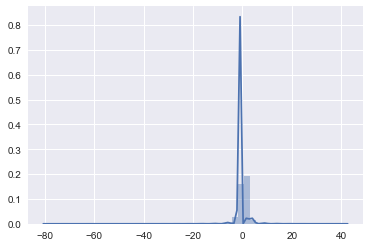

In [18]:
sns.distplot(hashed.data)

0.800003934427


NameError: name 'preds' is not defined

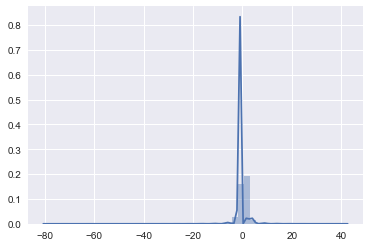

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

labels = df.positive
texts = df.text

transformer = FeatureHasher(input_type='string')
matrix = transformer.fit_transform(map(lambda x: x.split(), texts)) # в случае FeatureHasher

sns.distplot(matrix.data)

for classifier in [LogisticRegression, LinearSVC]:
    clf = classifier()
    print(cross_val_score(clf, matrix, labels, scoring="accuracy").mean())
    print(preds[10], ' - ', texts[i])
    print(preds[6915], ' - ', texts[i])